In [1]:
import numpy as np
import pandas as pd


In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
bwght = pd.read_csv('bwght.csv')

In [3]:
bwght.shape

(1388, 14)

In [4]:
bwght['cigs']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       6
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1358     0
1359     3
1360     0
1361    10
1362     0
1363     0
1364     0
1365     0
1366     0
1367    15
1368     0
1369     0
1370     0
1371     0
1372     0
1373     0
1374     0
1375    20
1376     0
1377     0
1378     0
1379     0
1380     0
1381     0
1382     0
1383     0
1384     0
1385     0
1386     0
1387     0
Name: cigs, Length: 1388, dtype: int64

In [5]:
bwght.mean()

faminc       29.026657
cigtax       19.552954
cigprice    130.559006
bwght       118.699568
fatheduc     13.186242
motheduc     12.935833
parity        1.632565
male          0.520893
white         0.784582
cigs          2.087176
lbwght        4.760031
bwghtlbs      7.418723
packs         0.104359
lfaminc       3.071271
dtype: float64

In [6]:
def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(bwght)

,mean,std,min,max,median,is null
faminc,29.026657,18.739285,0.500000,65.000000,27.500000,0
cigtax,19.552954,7.795598,2.000000,38.000000,20.000000,0
cigprice,130.559006,10.244484,103.800000,152.500000,130.800000,0
bwght,118.699568,20.353964,23.000000,271.000000,120.000000,0
fatheduc,13.186242,2.745985,1.000000,18.000000,12.000000,196
motheduc,12.935833,2.376728,2.000000,18.000000,12.000000,1
parity,1.632565,0.894027,1.000000,6.000000,1.000000,0
male,0.520893,0.499743,0.000000,1.000000,1.000000,0
white,0.784582,0.411260,0.000000,1.000000,1.000000,0
cigs,2.087176,5.972688,0.000000,50.000000,0.000000,0


In [7]:
bwght.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244484,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918064
min,0.500000,2.000000,103.800000,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800000,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800000,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


In [8]:
bwght.columns

Index(['faminc', 'cigtax', 'cigprice', 'bwght', 'fatheduc', 'motheduc',
       'parity', 'male', 'white', 'cigs', 'lbwght', 'bwghtlbs', 'packs',
       'lfaminc'],
      dtype='object')

In [9]:
bwght['cigs'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
model1 = smf.OLS(bwght['bwght'],sm.add_constant(bwght['cigs'])).fit()
Xdata = pd.concat((bwght['cigs'],bwght['faminc']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['bwght'],Xdata).fit()
Xdata = np.matrix([[1,0,20],[1,10,20]])
model1.summary()
model1.predict(Xdata)

array([118.82942524, 114.19534984])

In [13]:
model1 = smf.OLS(bwght['bwght'],sm.add_constant(bwght['cigs'])).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     32.24
Date:                Fri, 28 Sep 2018   Prob (F-statistic):           1.66e-08
Time:                        19:28:22   Log-Likelihood:                -6135.5
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1386   BIC:                         1.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.7719      0.572    209.267      0.000     118.649     120.895
cigs          -0.5138      0.090     -5.678      0.000      -0.691      -0.336
==============================================================================
Omnibus:                      118.187   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.742
Skew:                          -0.156   Prob(JB):                    8.92e-139
Kurtosis:                       6.301   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model1 = smf.ols('bwght~cigs+(faminc+cigs)**2-1',data=bwght).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1275.
Date:                Fri, 28 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:27:19   Log-Likelihood:                -7699.9
No. Observations:                1388   AIC:                         1.541e+04
Df Residuals:                    1385   BIC:                         1.542e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cigs            5.5202      0.452     12.210      0.000       4.633       6.407
faminc          2.8845      0.050     57.870      0.000       2.787       2.982
faminc:cigs    -0.1477      0.020     -7.413      0.000      -0.187      -0.109
==============================================================================
Omnibus:                       49.659   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.122
Skew:                          -0.424   Prob(JB):                     2.15e-11
Kurtosis:                       2.637   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Xdata = pd.concat((bwght['cigs'],bwght['faminc']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['bwght'],Xdata).fit()
Xdata = np.matrix([[1,0,20],[1,10,20]])
model1.predict(Xdata)

array([118.82942524, 114.19534984])

In [75]:
model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit()
#model1.summary()
Xdata = pd.DataFrame({'cigs':[0,10],'faminc':[20,20]})
model1.predict(Xdata)

0    118.829425
1    114.195350
dtype: float64

In [16]:
model1 = smf.ols('bwght~cigs+faminc-1',data=bwght).fit()
#no cons use -1
Xdata = pd.DataFrame({'cigs':[0,10],'faminc':[20,20]})
model1.predict(Xdata)

0    56.483361
1    84.728897
dtype: float64

In [ ]:
model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit()
model1.summary()

In [47]:
model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit(cov_type='HC3')
#HC3=white test     log np.log
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.68
Date:                Thu, 14 Jun 2018   Prob (F-statistic):           5.35e-10
Time:                        18:42:30   Log-Likelihood:                -6130.4
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1385   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9741      1.038    112.647      0.000     114.939     119.009
cigs          -0.4634      0.090     -5.156      0.000      -0.640      -0.287
faminc         0.0928      0.029      3.240      0.001       0.037       0.149
==============================================================================
Omnibus:                      116.751   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.781
Skew:                          -0.154   Prob(JB):                    2.61e-135
Kurtosis:                       6.259   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [63]:
model1 = smf.ols('np.log(bwght)~cigs+faminc',data=bwght).fit()


model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(bwght)   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     18.82
Date:                Thu, 14 Jun 2018   Prob (F-statistic):           8.61e-09
Time:                        19:04:55   Log-Likelihood:                 349.89
No. Observations:                1388   AIC:                            -693.8
Df Residuals:                    1385   BIC:                            -678.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7440      0.010    481.958      0.000       4.725       4.763
cigs          -0.0040      0.001     -4.693      0.000      -0.006      -0.002
faminc         0.0008      0.000      3.081      0.002       0.000       0.001
==============================================================================
Omnibus:                      606.601   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5809.217
Skew:                          -1.777   Prob(JB):                         0.00
Kurtosis:                      12.371   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
bwght.groupby(['cigs']).mean()
# 2 things just comma cigs,cigtax
#drop   bwght = drop

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,lbwght,bwghtlbs,packs,lfaminc
cigs,,,,,,,,,,,,,
0,30.488520,19.406037,130.439456,120.061224,13.388943,13.170213,1.616497,0.529762,0.785714,4.771778,7.503827,0.00,3.137173
1,35.833333,20.000000,139.400000,122.666667,13.333333,12.333333,1.333333,0.666667,1.000000,4.804115,7.666667,0.05,3.576641
2,19.875000,22.000000,133.975000,109.500000,11.500000,11.000000,1.250000,0.500000,0.750000,4.684464,6.843750,0.10,2.200757
3,15.357143,21.142857,130.342857,115.571429,11.200000,11.714286,1.571429,0.142857,0.714286,4.739088,7.223214,0.15,2.462831
4,18.388889,19.055556,129.777778,109.888889,13.250000,11.666667,1.666667,0.444444,0.555556,4.687729,6.868056,0.20,2.516068
5,24.842105,19.236842,130.863158,114.000000,12.705882,12.368421,1.736842,0.473684,0.789474,4.726520,7.125000,0.25,2.946275
6,30.000000,17.750000,125.200000,123.166667,10.000000,12.333333,1.333333,0.166667,0.666667,4.799497,7.697917,0.30,3.296169
7,26.250000,19.250000,124.250000,120.000000,13.333333,12.750000,1.750000,0.000000,0.750000,4.780502,7.500000,0.35,3.234549
8,14.500000,22.200000,134.260000,91.000000,11.750000,11.800000,2.400000,0.400000,0.800000,4.473817,5.687500,0.40,2.363697


In [23]:
bwght['cig_cuts'] = pd.cut(bwght['cigs'],[-1,0,10,20,30,40,50])
#cut point created 分组 然后再排列groupby
bwght = bwght.drop('cigtax', axis=1)
#drop some data colmn is axis=1
bwght.groupby(['cig_cuts','white']).mean()

faminc    cigprice       bwght   fatheduc   motheduc  \
cig_cuts white                                                            
(-1, 0]  0      19.103175  128.317857  114.678571  12.676829  12.583333   
         1      33.593615  131.018074  121.529221  13.523645  13.330444   
(0, 10]  0      12.833333  127.922222  107.851852  11.571429  11.518519   
         1      24.319767  132.459302  114.546512  11.866667  11.767442   
(10, 20] 0      13.833333  131.560000  110.200000  11.500000  11.466667   
         1      22.260563  131.459155  109.239437  12.327586  11.774648   
(20, 30] 0       3.500000  120.500000  138.000000        NaN  10.000000   
         1      18.500000  125.975000  100.750000   9.666667  10.500000   
(30, 40] 0      12.000000  130.550000  102.000000   6.000000  10.000000   
         1      19.750000  133.700000  108.750000  12.333333  10.000000   
(40, 50] 0      14.000000  123.200000  105.500000        NaN  12.000000   
         1            NaN         NaN         NaN        NaN        NaN   

                  parity      male       cigs    lbwght  bwghtlbs     packs  \
cig_cuts white                                                                
(-1, 0]  0      1.722222  0.551587   0.000000  4.720245  7.167411  0.000000   
         1      1.587662  0.523810   0.000000  4.785833  7.595576  0.000000   
(0, 10]  0      1.925926  0.407407   7.074074  4.664079  6.740741  0.353704   
         1      1.546512  0.395349   7.383721  4.726116  7.159157  0.369186   
(10, 20] 0      1.933333  0.533333  19.333333  4.687532  6.887500  0.966667   
         1      1.760563  0.549296  18.239437  4.676872  6.827465  0.911972   
(20, 30] 0      3.000000  1.000000  30.000000  4.927254  8.625000  1.500000   
         1      1.250000  0.500000  30.000000  4.608179  6.296875  1.500000   
(30, 40] 0      1.500000  0.500000  40.000000  4.616784  6.375000  2.000000   
         1      2.000000  0.500000  40.000000  4.668868  6.796875  2.000000   
(40, 50] 0      3.500000  1.000000  48.000000  4.647801  6.593750  2.400000   
         1           NaN       NaN        NaN       NaN       NaN       NaN   

                 lfaminc  
cig_cuts white            
(-1, 0]  0      2.502868  
         1      3.310165  
(0, 10]  0      2.093837  
         1      2.915139  
(10, 20] 0      2.442993  
         1      2.812995  
(20, 30] 0      1.252763  
         1      2.524123  
(30, 40] 0      2.311260  
         1      2.853254  
(40, 50] 0      1.310519  
         1           NaN

In [68]:
bwght['smokes'] = (bwght['cigs']>0).astype(int)
bwght['smokes'].unique()
model2 = smf.logit('smokes~faminc+white+motheduc+fatheduc',data=bwght).fit()
model2.summary()
model2 = smf.glm('smokes~faminc+white+motheduc+fatheduc',family=sm.families.Binomial(),data=bwght).fit()
model2.summary()
model2 = smf.glm('cigs~faminc+white+motheduc+fatheduc',family=sm.families.Poisson(),data=bwght).fit()
model2.summary()









Optimization terminated successfully.
         Current function value: 0.363092
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   cigs   No. Observations:                 1191
Model:                            GLM   Df Residuals:                     1186
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4382.6
Date:                Thu, 14 Jun 2018   Deviance:                       8084.7
Time:                        19:13:55   Pearson chi2:                 1.61e+04
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6070      0.117     30.843      0.000       3.378       3.836
faminc        -0.0188      0.002    -11.604      0.000      -0.022      -0.016
white          0.3932      0.064      6.178      0.000       0.268       0.518
motheduc      -0.1833      0.011    -16.351      0.000      -0.205      -0.161
fatheduc      -0.0474      0.010     -4.867      0.000      -0.066      -0.028
==============================================================================
"""

In [1]:
import numpy as np
import pandas as pd


bwght = pd.read_csv('bwght.csv')

bwght.shape

bwght['cigs']

bwght.mean()

def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(bwght)

bwght.describe()

bwght.columns

bwght['cigs'].values

model1 = smf.OLS(bwght['bwght'],sm.add_constant(bwght['cigs'])).fit()
Xdata = pd.concat((bwght['cigs'],bwght['faminc']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['bwght'],Xdata).fit()
Xdata = np.matrix([[1,0,20],[1,10,20]])
model1.summary()
model1.predict(Xdata)

model1 = smf.ols('bwght~cigs+(faminc+cigs)**2-1',data=bwght).fit()
model1.summary()

model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit()
#model1.summary()
Xdata = pd.DataFrame({'cigs':[0,10],'faminc':[20,20]})
model1.predict(Xdata)

model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit()
model1.summary()

model1 = smf.ols('bwght~cigs+faminc',data=bwght).fit(cov_type='HC3')
model1.summary()

model1 = smf.ols('np.log(bwght)~cigs+faminc',data=bwght).fit()


model1.summary()

bwght.groupby(['cigs']).mean()


bwght['cig_cuts'] = pd.cut(bwght['cigs'],[-1,0,10,20,30,40,50])
bwght.groupby(['cig_cuts']).mean()

bwght['smokes'] = (bwght['cigs']>0).astype(int)
bwght['smokes'].unique()
model2 = smf.logit('smokes~faminc+white+motheduc+fatheduc',data=bwght).fit()
model2.summary()
model2 = smf.glm('smokes~faminc+white+motheduc+fatheduc',family=sm.families.Binomial(),data=bwght).fit()
model2.summary()
model2 = smf.glm('cigs~faminc+white+motheduc+fatheduc',family=sm.families.Poisson(),data=bwght).fit()
model2.summary()







import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook 
#can edit look better but only work in jupter
#%matplotlib inline
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

In [27]:
x = np.linspace(0,10,100)
#from 0 to 10, 100 of numbers
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

<IPython.core.display.Javascript object>


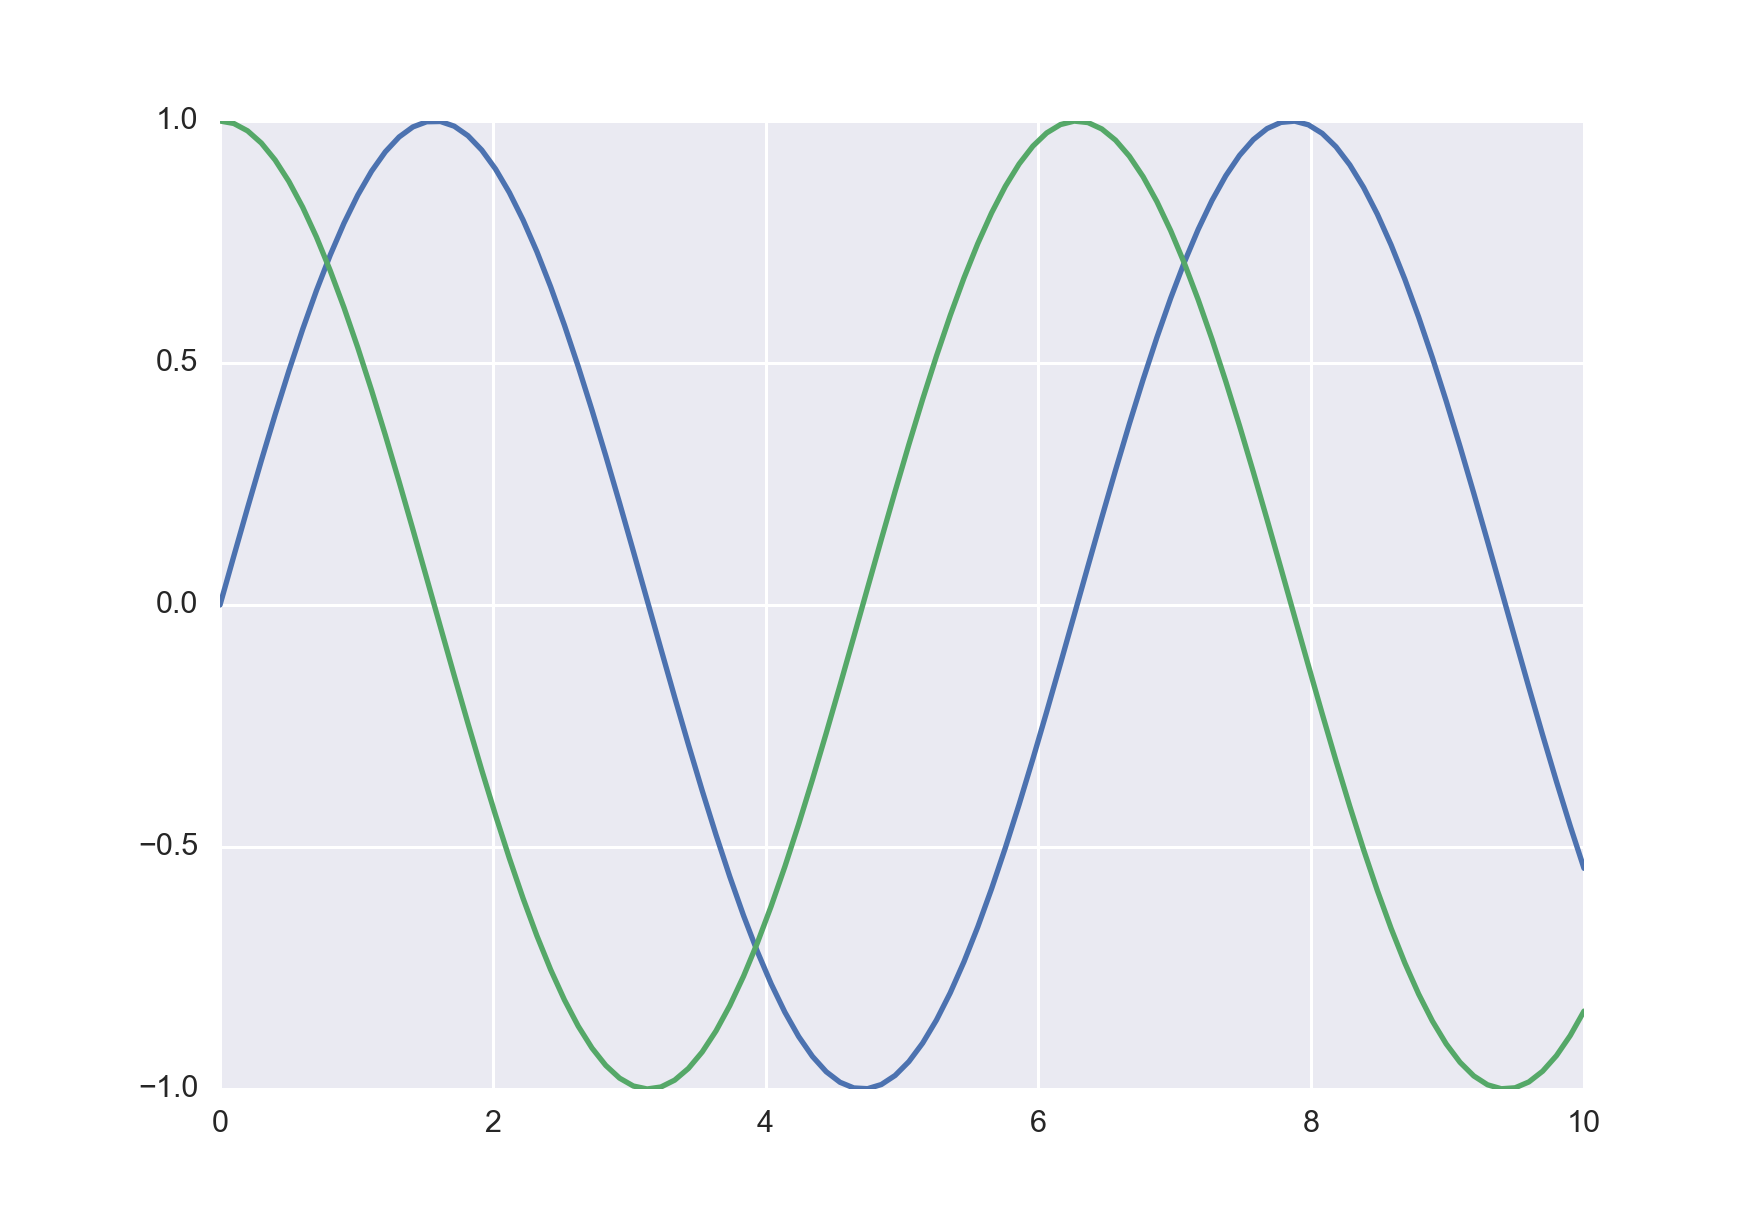

In [28]:
fig = plt.figure()
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
#create new figure for new plot

<IPython.core.display.Javascript object>


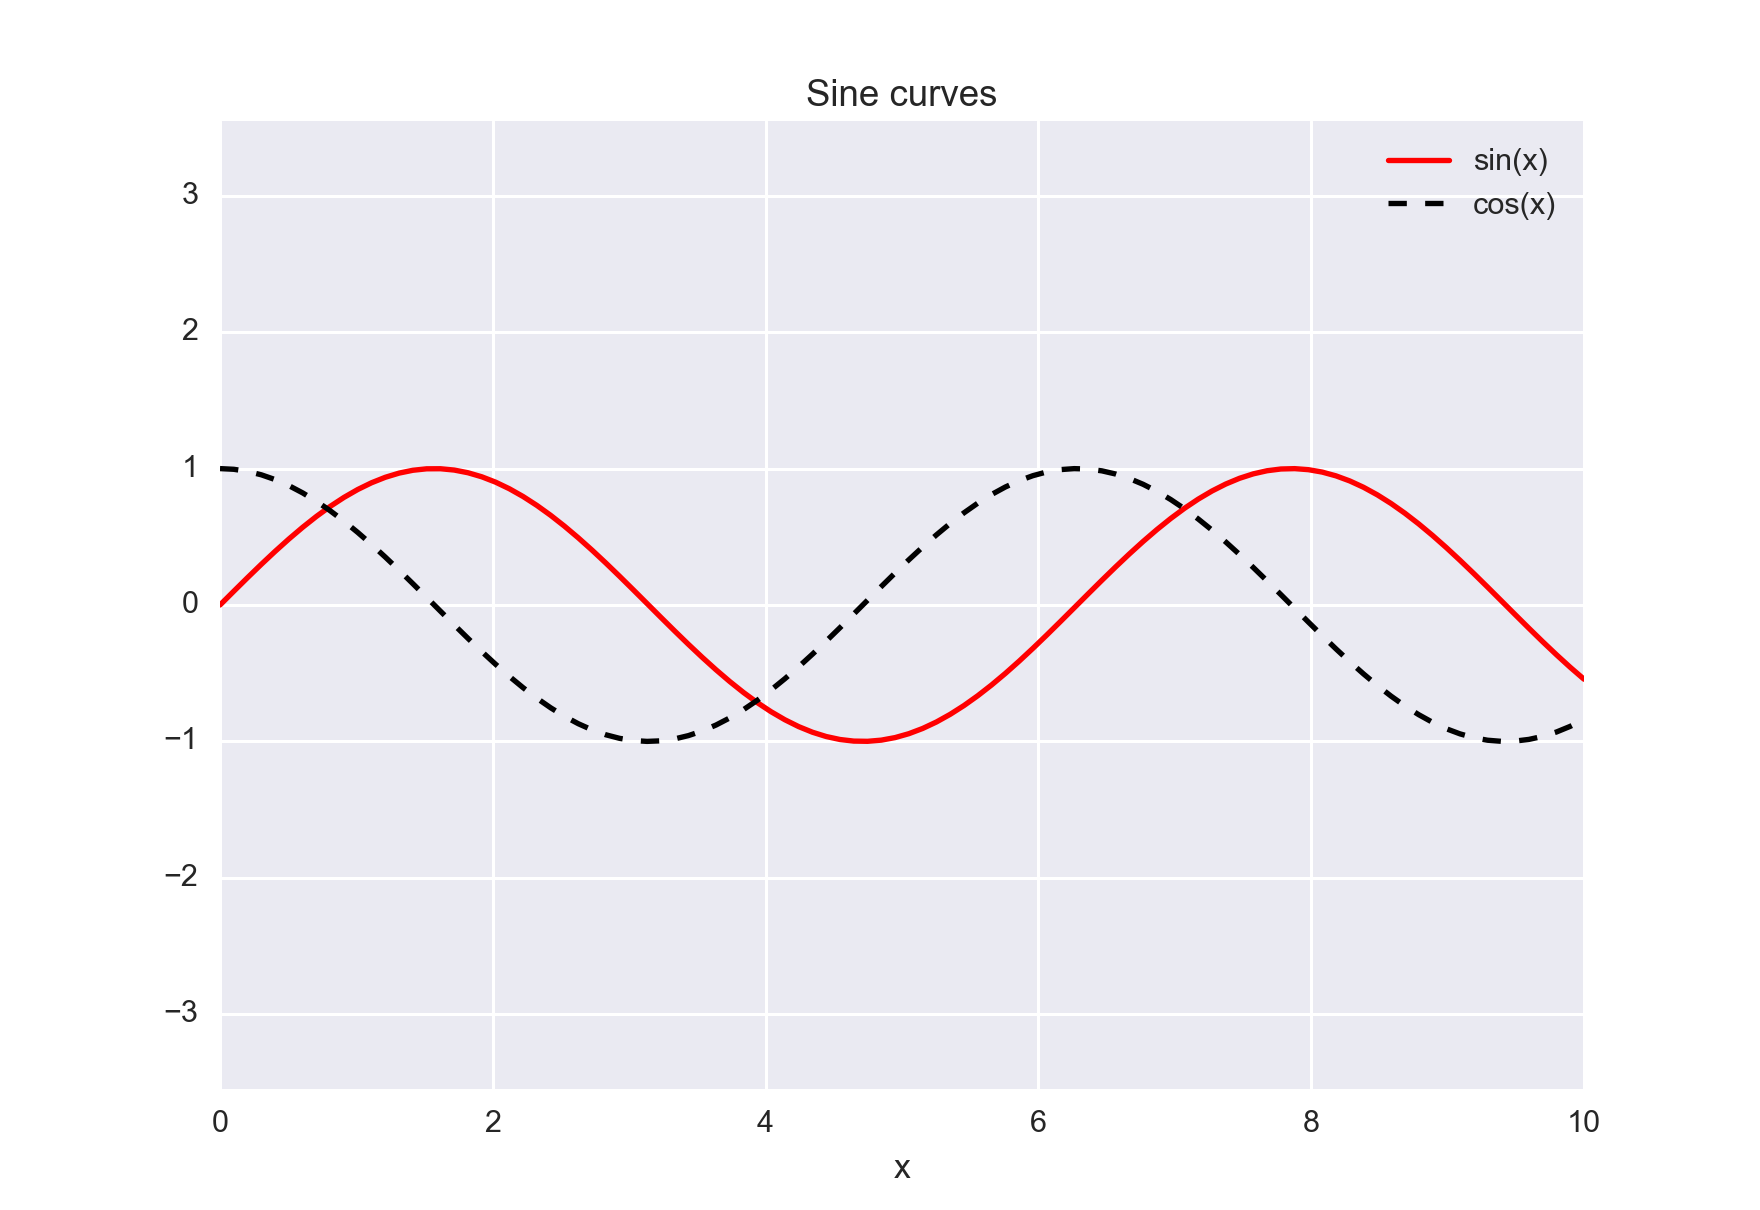

In [29]:
fig = plt.figure()
plt.plot(x,np.sin(x),linestyle='-',label='sin(x)',color='red')
plt.plot(x,np.cos(x),linestyle='--',label='cos(x)',color='black')
plt.xlabel('x')
plt.title('Sine curves')
plt.legend()
plt.axis('equal')
fig.savefig('sinecurves.png')


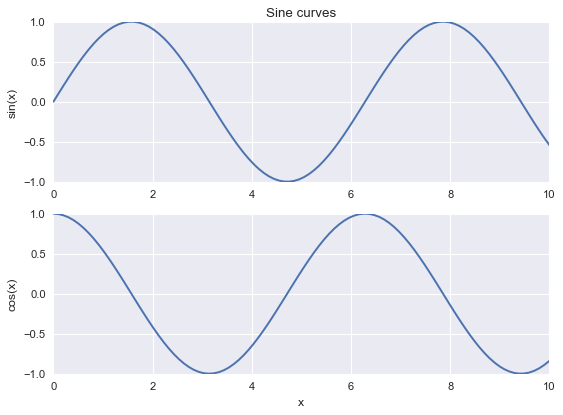

In [25]:
fig,ax = plt.subplots(2)
#2 plots 
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))
#set labels
ax[0].set_ylabel('sin(x)')
ax[1].set_ylabel('cos(x)')
ax[0].set_title('Sine curves')
ax[1].set_xlabel('x')

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [39]:
#%matplotlib notebook
%matplotlib inline
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

In [4]:
x = np.linspace(0,10,100)
print(x)

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

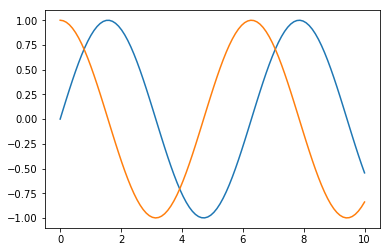

In [5]:
fig = plt.figure()
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

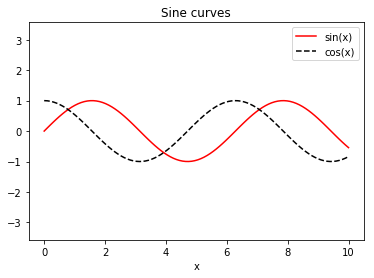

In [6]:
fig = plt.figure()
plt.plot(x,np.sin(x),linestyle='-',label='sin(x)',color='red')
plt.plot(x,np.cos(x),linestyle='--',label='cos(x)',color='black')
plt.xlabel('x')
plt.title('Sine curves')
plt.legend()
plt.axis('equal')
fig.savefig('sinecurves.png')


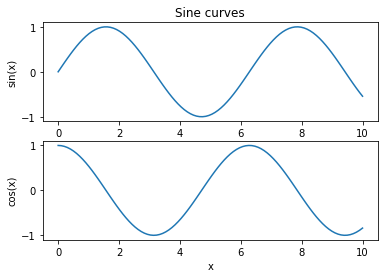

In [7]:
fig,ax = plt.subplots(2)
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))
ax[0].set_ylabel('sin(x)')
ax[1].set_ylabel('cos(x)')
ax[0].set_title('Sine curves')
ax[1].set_xlabel('x')

In [30]:
bwght = pd.read_csv('BWGHT.CSV')

In [31]:
traffic = pd.read_csv('traffic2.csv')

In [32]:
traffic.head()

,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,rtotacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
0,1981,40511,365,15626,24520,38235,323,14743,23169,236,...,2.484907,10.55151,5.777652,0.844776,6.963190,8.830251,8.153062,0,0,NaN
1,1981,36034,329,14469,21236,33989,294,13620,20075,200,...,2.079442,10.43379,5.683580,0.864986,6.839477,8.708970,8.046550,0,0,0.900990
2,1981,40328,369,16026,23933,37990,335,15105,22550,253,...,2.484907,10.54508,5.814130,0.881811,7.041412,8.825119,8.148446,0,0,0.913027
3,1981,37699,369,15560,21770,35457,326,14654,20477,270,...,2.639057,10.47608,5.786897,0.919424,6.916715,8.750525,8.071531,0,0,0.914997
4,1981,38816,355,16546,21915,36611,321,15569,20721,263,...,1.791759,10.50810,5.771441,0.876786,6.986567,8.816705,8.111928,0,0,0.978806


<IPython.core.display.Javascript object>


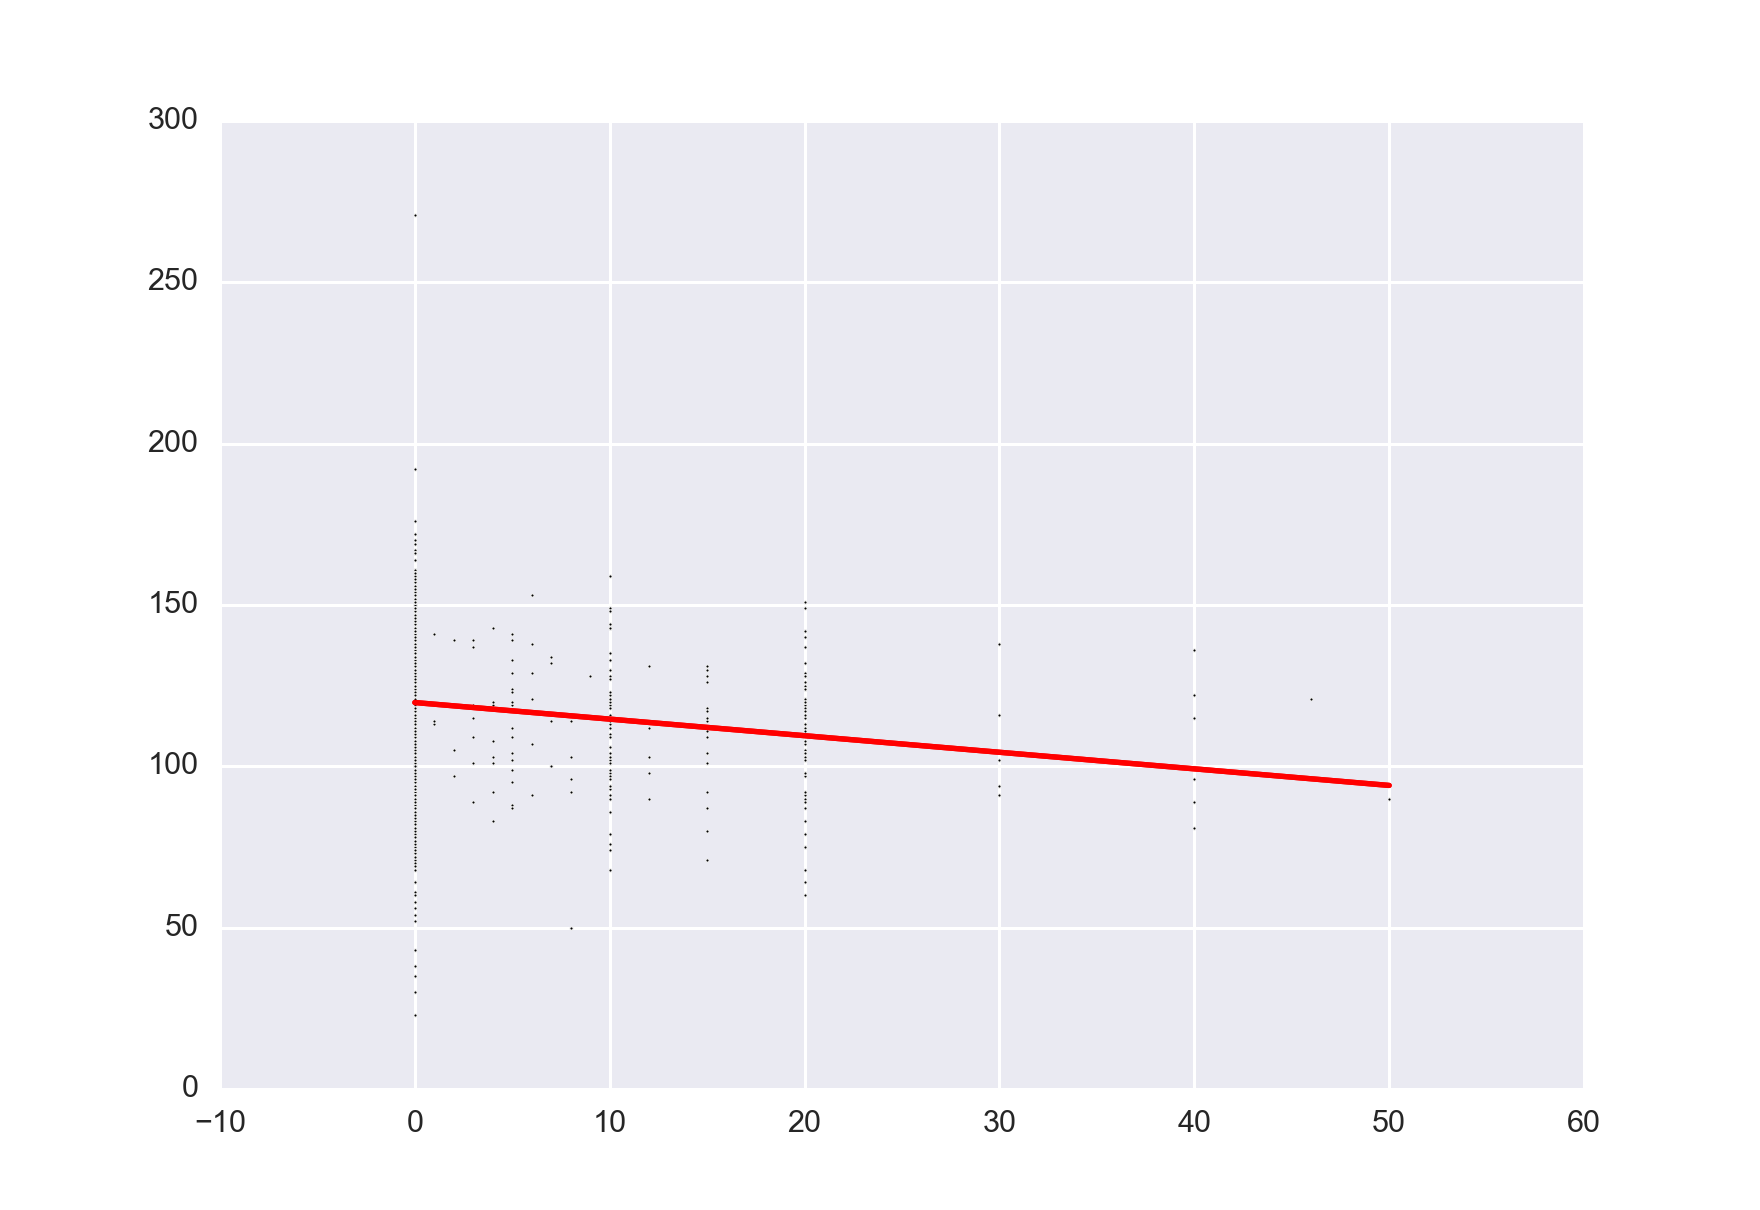

In [35]:
fig = plt.figure()
plt.scatter(bwght['cigs'],bwght['bwght'],s=1,marker='o',c='black')
model1 = smf.ols('bwght~cigs',data=bwght).fit()
x = np.linspace(0,50,100)
y = model1.predict(pd.DataFrame({'cigs':x}))
plt.plot(x,y,c="red")


<IPython.core.display.Javascript object>


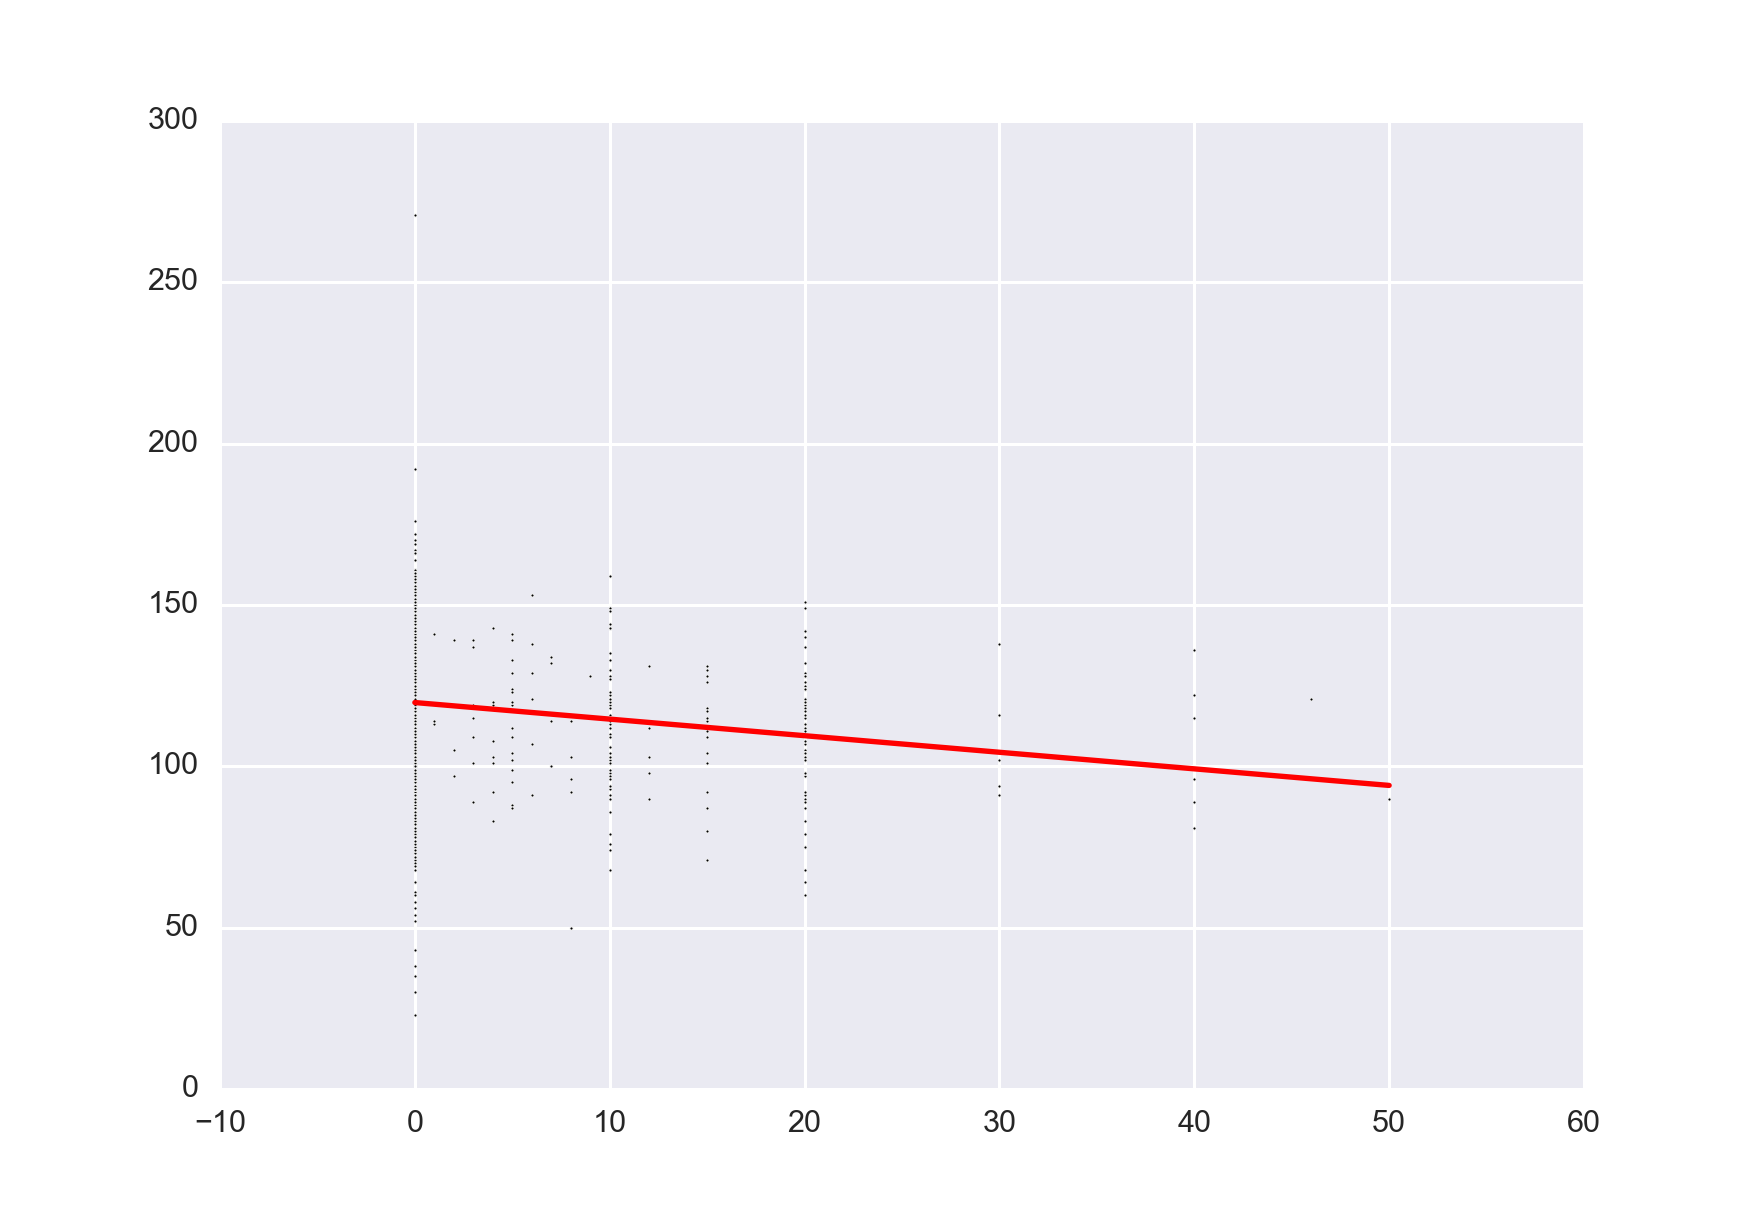

In [37]:
#other way
fig = plt.figure()
plt.scatter(bwght['cigs'],bwght['bwght'],s=1,marker='o',c='black')
model1 = smf.OLS(bwght['bwght'],sm.add_constant(bwght['cigs'])).fit()
x = np.linspace(0,50,100)
y = model1.predict(sm.add_constant(x))
plt.plot(x,y,c="red")

<IPython.core.display.Javascript object>


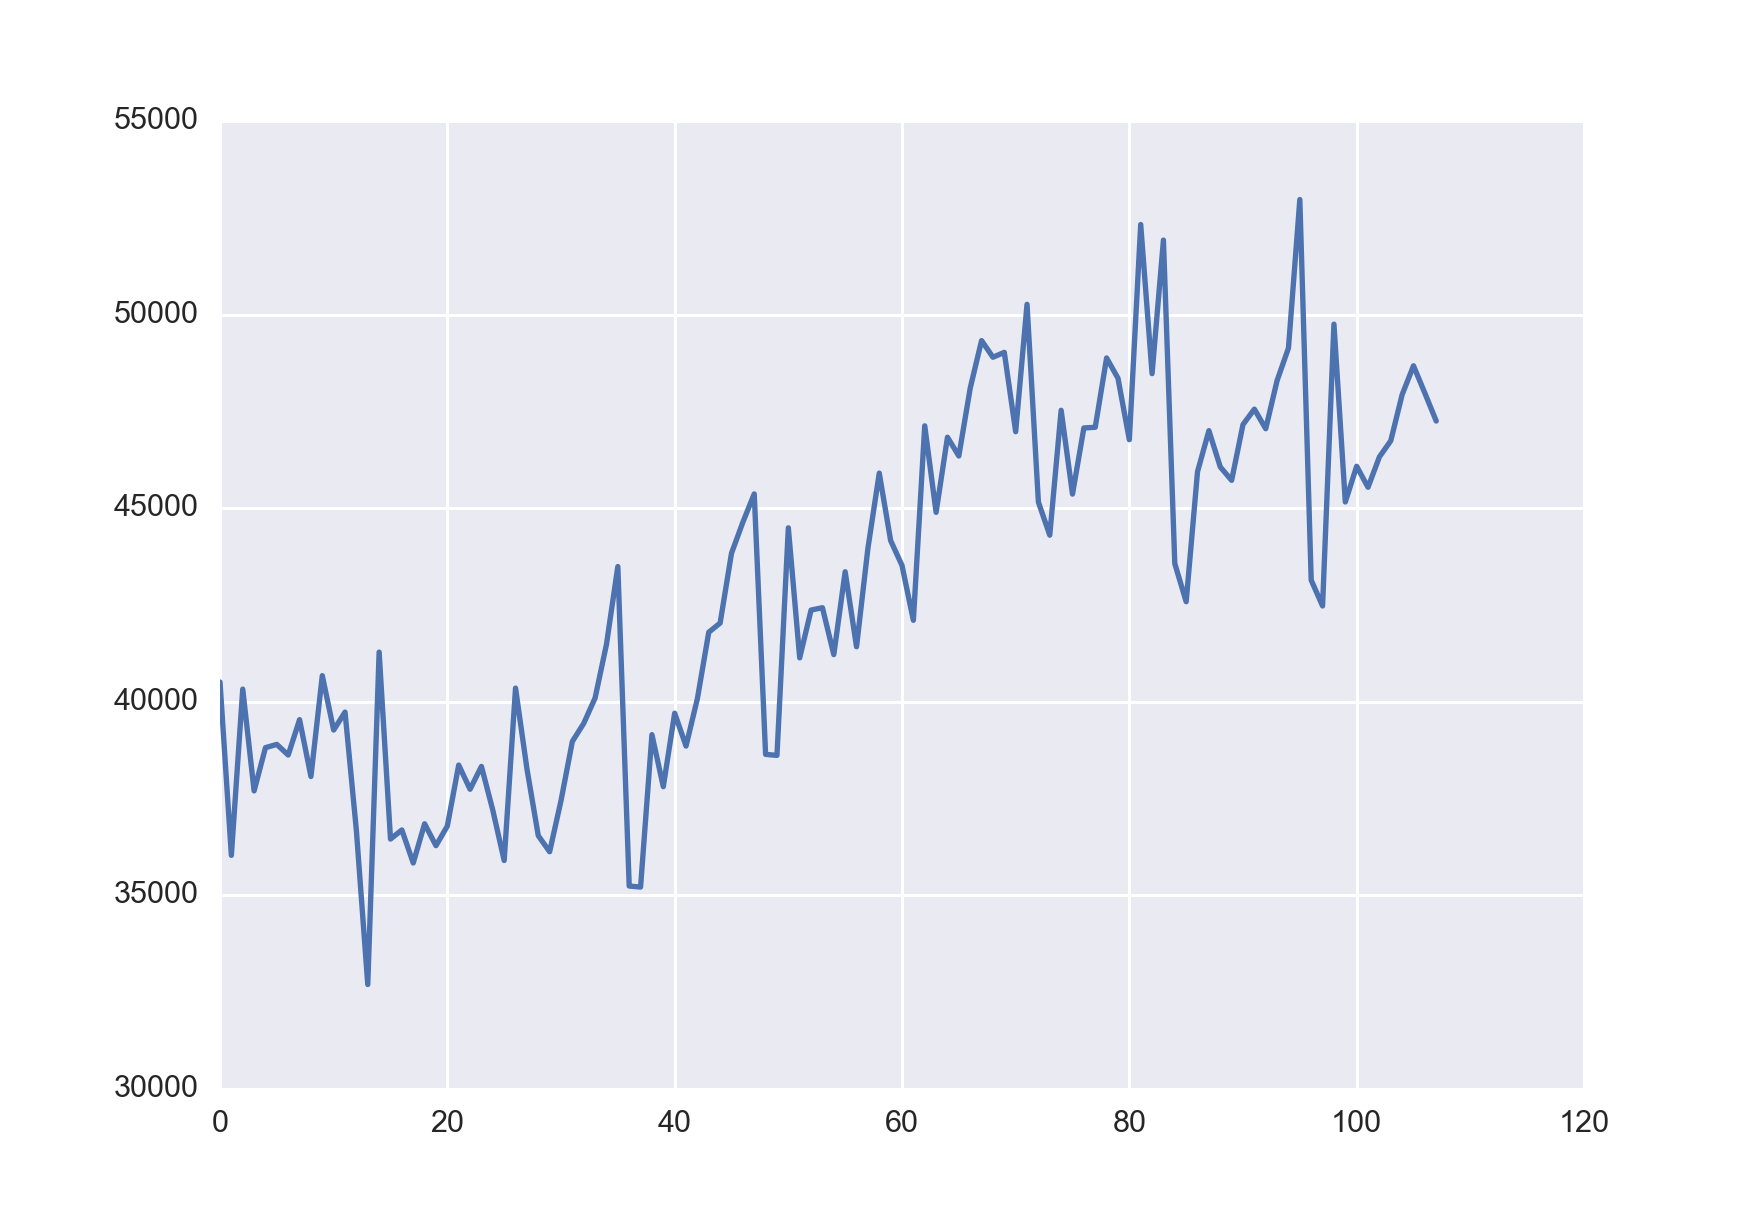

In [38]:
fig = plt.figure()
traffic['totacc'].plot()
#total accident of CA

Optimization terminated successfully.
         Current function value: 0.408616
         Iterations 6


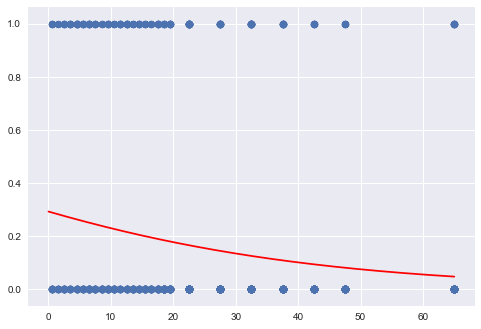

In [47]:
fig = plt.figure()
bwght['smokes'] = (bwght['cigs']>0).astype(int)
plt.scatter(bwght['faminc'],bwght['smokes'])
model2 = smf.logit('smokes~faminc',data=bwght).fit()
#logic model
x = np.linspace(0,65,1000)
y = model2.predict(pd.DataFrame({'faminc':x}))
plt.plot(x,y,c="red")

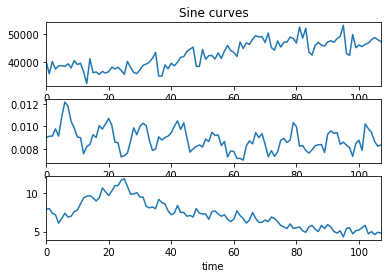

In [30]:
traffic['pfatal'] = traffic['fatacc']/traffic['totacc']
fig = plt.figure()
plt.subplot(3,1,1)
traffic['totacc'].plot()
plt.title('Time Series Plot')
plt.subplot(3,1,2)
traffic['pfatal'].plot()
plt.subplot(3,1,3)
traffic['unem'].plot()
plt.xlabel('time')

<IPython.core.display.Javascript object>


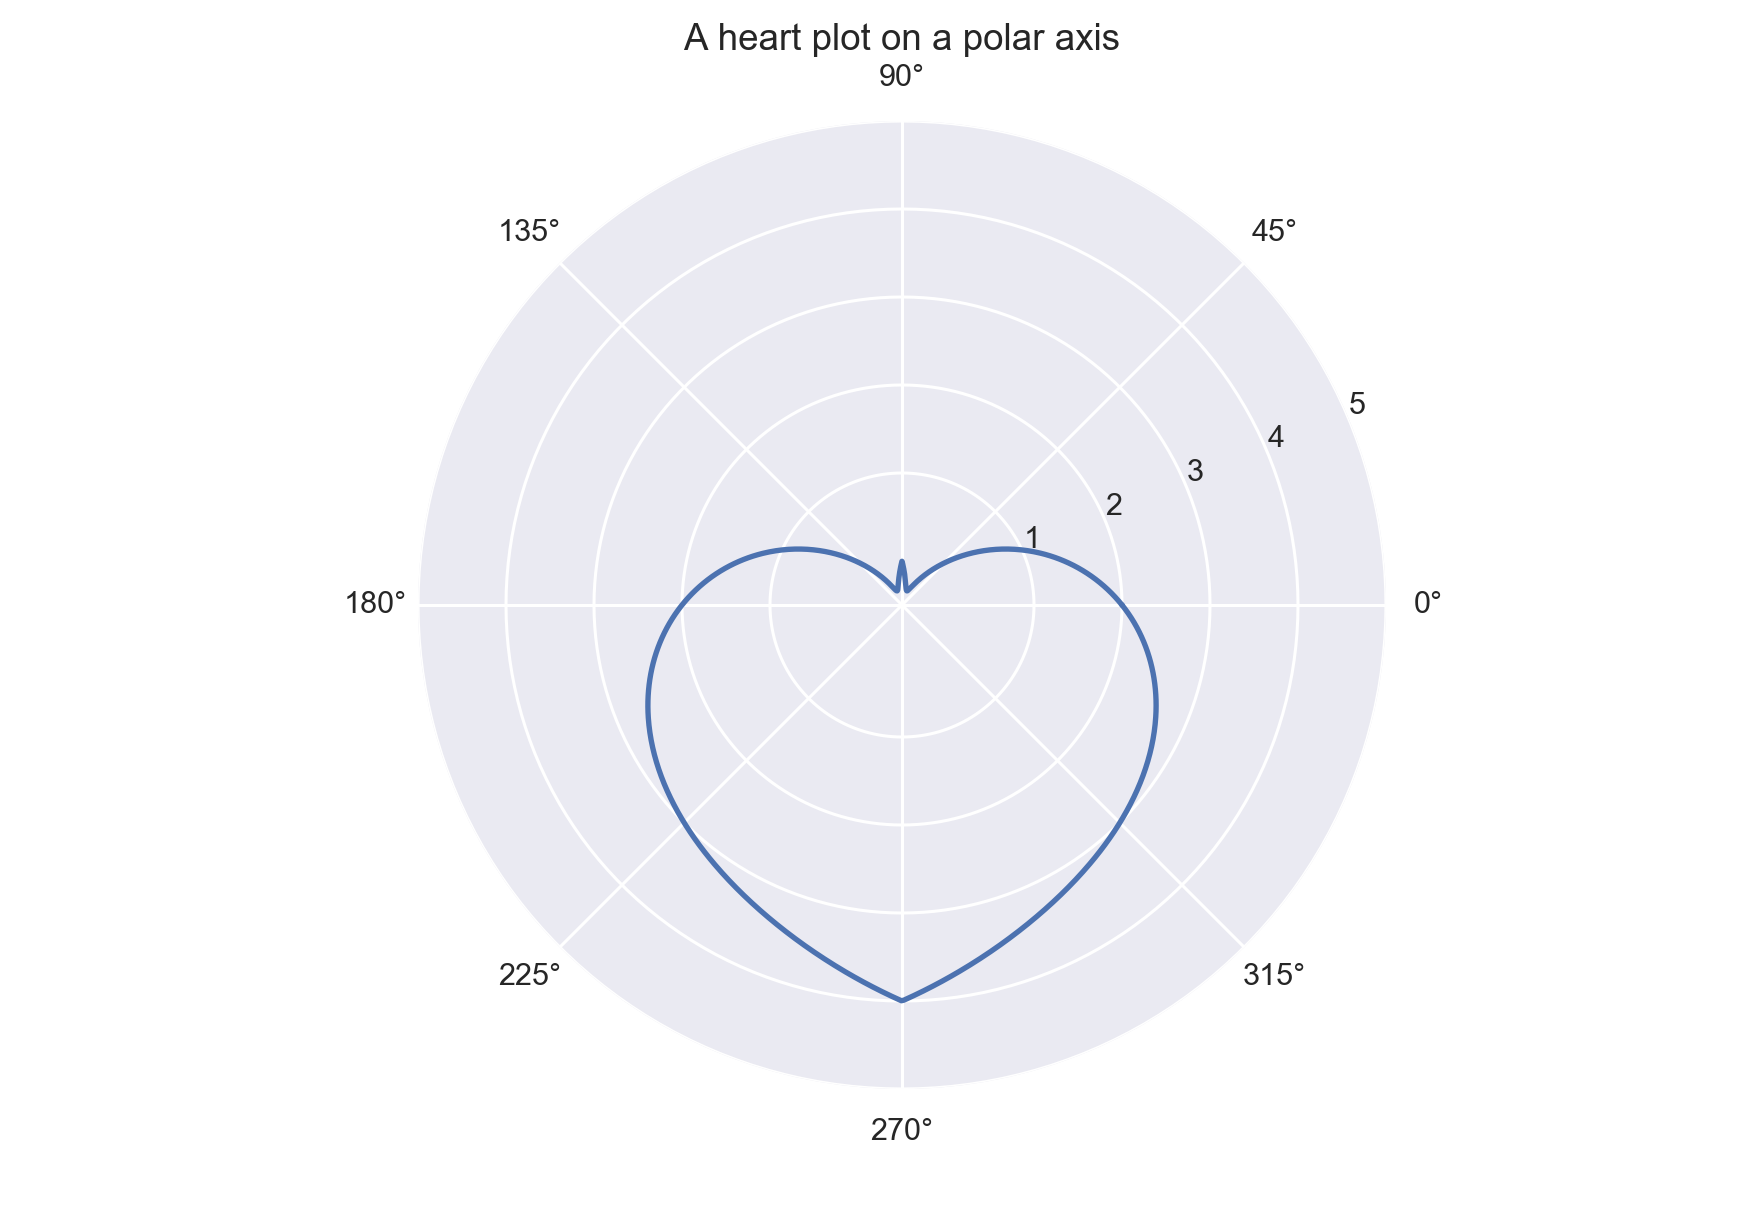

In [39]:
fig = plt.figure()
theta = np.linspace(0, 2*np.pi, 1000)
r = 3-2*np.sin(theta)+np.cos(2*theta)-2*np.abs(np.cos(theta))

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(5)
ax.set_rticks([1,2,3,4,5])  # less radial ticks
ax.grid(True)

ax.set_title("A heart plot on a polar axis", va='bottom')
plt.show()